## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix, classification_report

## Disable Warnings

In [2]:
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

## Load data

In [3]:
data = pd.read_csv("employee_turnover.csv")

In [4]:
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


## Data Statistics

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [7]:
data.isna().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of        satisfaction_level  last_evaluation  number_project  \
0                   False            False           False   
1                   False            False           False   
2                   False            False           False   
3                   False            False           False   
4                   False            False           False   
...                   ...              ...             ...   
14994               False            False           False   
14995               False            False           False   
14996               False            False           False   
14997               False            False           False   
14998               False            False           False   

       average_montly_hours  time_spend_company  Work_accident   left  \
0                     False               False          False  False   
1                     False               False

In [8]:
data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [9]:
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [10]:
data.shape

(14999, 10)

In [11]:
data = data.rename(columns = {'sales':'department'})

In [12]:
data.department.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [13]:
data['department']=np.where(data['department'] =='support', 'technical', data['department'])
data['department']=np.where(data['department'] =='IT', 'technical', data['department'])

## Creating Variables for Categorical Variables

In [14]:
cat_vars=['department','salary']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1

In [15]:
data.drop(data.columns[[8, 9]], axis=1, inplace=True)
data.columns.values

array(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'left', 'promotion_last_5years', 'department_RandD',
       'department_accounting', 'department_hr', 'department_management',
       'department_marketing', 'department_product_mng',
       'department_sales', 'department_technical', 'salary_high',
       'salary_low', 'salary_medium'], dtype=object)

In [16]:
data_vars=data.columns.values.tolist()
y=['left']
X=[i for i in data_vars if i not in y]

## Feature Selection for Employee Turnover Prediction

In [17]:
model = LogisticRegression()
rfe = RFE(estimator=model, n_features_to_select=10)
rfe.fit(data[X], data[y])
print(rfe.support_)
print(rfe.ranking_)

[ True  True False False  True  True  True  True False  True  True False
 False False False  True  True False]
[1 1 3 9 1 1 1 1 5 1 1 6 8 7 4 1 1 2]


In [18]:
cols = ['satisfaction_level', 'last_evaluation', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 
      'department_RandD', 'department_hr', 'department_management', 'salary_high', 'salary_low'] 
X = data[cols]
y = data['left']

## Logistic Regression Model to Predict Employee Turnover

### Data Splitting

In [19]:
xtrain, xtest, ytrain, ytest = train_test_split(X, 
                                                y, 
                                                test_size=0.3, 
                                                random_state=0)

### Model Initilization

In [20]:
logreg = LogisticRegression()

### Fitting Model to Data

In [21]:
logreg.fit(xtrain, ytrain)

LogisticRegression()

In [22]:
logreg.score(xtrain, ytrain)

0.7658824649966663

In [23]:
print('Logistic regression accuracy: {:.3f}'.format(accuracy_score(ytest, logreg.predict(xtest))))

Logistic regression accuracy: 0.771


## Random Forest Classification Model

### Model Initilization

In [24]:
rf = RandomForestClassifier()

In [25]:
rf.fit(xtrain, ytrain)

RandomForestClassifier()

In [26]:
rf.score(xtrain, ytrain)

0.9972378321744928

In [27]:
print('Random Forest Accuracy: {:.3f}'.format(accuracy_score(ytest, rf.predict(xtest))))

Random Forest Accuracy: 0.978


## Confusion Matrix

### RF Model

In [28]:
print(classification_report(ytest, rf.predict(xtest)))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      3462
           1       0.95      0.96      0.95      1038

    accuracy                           0.98      4500
   macro avg       0.97      0.97      0.97      4500
weighted avg       0.98      0.98      0.98      4500



Text(0.5, 1.0, 'Random Forest')

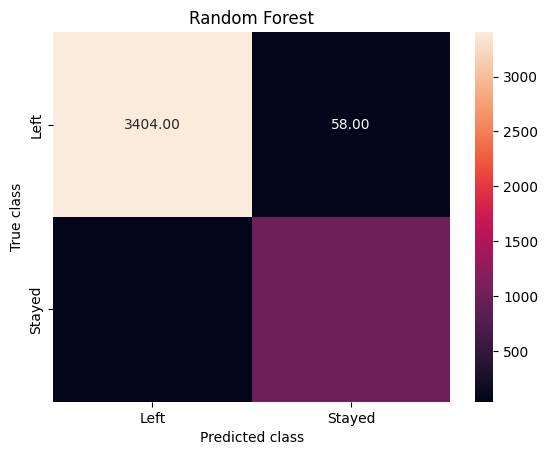

In [29]:
ypred = rf.predict(xtest)
rf_cm = confusion_matrix(ytest, ypred)
sns.heatmap(rf_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random Forest')

### Logistic Regression

In [30]:
print(classification_report(ytest, logreg.predict(xtest)))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86      3462
           1       0.51      0.26      0.35      1038

    accuracy                           0.77      4500
   macro avg       0.66      0.59      0.60      4500
weighted avg       0.74      0.77      0.74      4500



Text(0.5, 1.0, 'Logistic Regression')

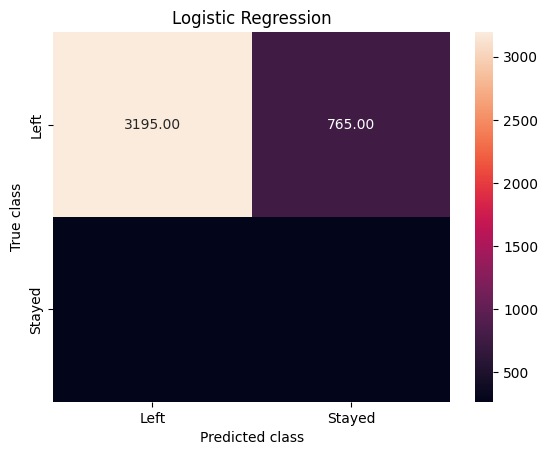

In [31]:
logreg_y_pred = logreg.predict(xtest)
logreg_cm = confusion_matrix(logreg_y_pred, ytest)
sns.heatmap(logreg_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Logistic Regression')

## Employee Turnover Prediction Curve

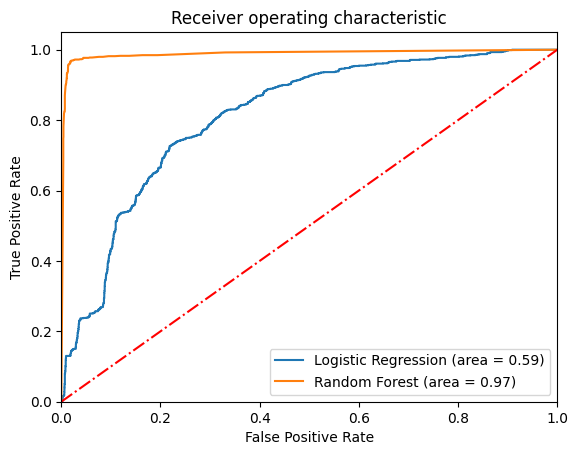

In [32]:
logit_roc_auc = roc_auc_score(ytest, logreg.predict(xtest))
fpr, tpr, thresholds = roc_curve(ytest, logreg.predict_proba(xtest)[:,1])
rf_roc_auc = roc_auc_score(ytest, rf.predict(xtest))
rf_fpr, rf_tpr, rf_thresholds = roc_curve(ytest, rf.predict_proba(xtest)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r-.')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [33]:
feature_labels = np.array(['satisfaction_level', 'last_evaluation', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 
      'department_RandD', 'department_hr', 'department_management', 'salary_high', 'salary_low'])
importance = rf.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

promotion_last_5years-0.22%
department_management-0.26%
department_hr-0.28%
department_RandD-0.32%
salary_high-0.72%
salary_low-1.14%
Work_accident-1.42%
last_evaluation-18.92%
time_spend_company-26.25%
satisfaction_level-50.47%
